<a href="https://colab.research.google.com/github/awfrancis/Capstone-3/blob/main/Capstone_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#This capstone is to test if there are any significant difference between the cost of Natural Gas Energy and the cost of Solar Power Energy. 
#It will also test to see if there's any significant difference between the cost of Natural Gas Energy and Wind Power Energy.

## Import Modules

In [1]:
# import & alias modules
import math 
import pandas as pd
from scipy import stats
import seaborn as sns 
import matplotlib.pyplot as plt
sns.set()

#Bringing in the Data
## Bring in the raw dat which I created from the following websites.
##Natural Gas cost of kWh (kilowatt per Hour) by the average cost per states.
https://paylesspower.com/blog/electric-rates-by-state/ 
##The average residential monthly consumption from each state.
https://www.eia.gov/electricity/sales_revenue_price/pdf/table5_a.pdf 
##Solar Power cost of kWh that would be used by US consumers.
#The price does not fluctuate between states.
https://www.energy.gov/eere/solar/sunshot-2030
##Information used to calculate the Wind Power cost of kWh that would be used by US consumers from each state.
https://www.energy.gov/eere/wind/advantages-and-challenges-wind-energy#:~:text=Wind%20power%20is%20cost%2Deffective,after%20the%20production%20tax%20credit. 
#The raw data.
https://drive.google.com/file/d/1mt1uwM2itpJpkDlvZXWCKv2w1KRq9sGP/view?usp=sharing



In [ ]:
from google.colab import files
uploaded = files.upload()

Saving energy_cost.csv to energy_cost.csv


#Giving the file a variable name.

In [ ]:
energy_cost = pd.read_csv('energy_cost.csv')

#Checking the Variable

In [ ]:
energy_cost.head()


,states,cost_per_kwh (Natural Gas),average_monthly_consumption (Natural Gas),ng_monthly_cost,ng_yearly_cost,ng_yearly_cost_y5,cost_per_kwh (Solar Energy),average_monthly_consumption (Solar Energy w/10% increase due to remote working),se_monthly_cost,se_yearly_cost,se_yearly_cost_y5,cost_per_kwh (Wind Power),average_monthly_consumption (Wind Power w/10% increase due to remote working),wp_monthly_cost,wp_yearly_cost,wp_yearly_cost_ y5
0,Alaska,0.21319,555,118.32,1419.85,2078.80,0.06,610.5,36.63,439.56,351.65,0.02,610.5,12.21,146.52,146.52
1,Alabama,0.12380,1201,148.68,1784.21,2612.26,0.06,1321.1,79.27,951.19,760.95,0.02,1321.1,26.42,317.06,317.06
2,Arkansas,0.09420,1118,105.32,1263.79,1850.31,0.06,1229.8,73.79,885.46,708.36,0.02,1229.8,24.60,295.15,295.15
3,Arizona,0.11700,1014,118.64,1423.66,2084.37,0.06,1115.4,66.92,803.09,642.47,0.02,1115.4,22.31,267.70,267.70
4,California,0.21430,532,114.01,1368.09,2003.02,0.06,585.2,35.11,421.34,337.08,0.02,585.2,11.70,140.45,140.45


##Checking the variable data types.

In [ ]:
energy_cost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 16 columns):
 #   Column                                                                           Non-Null Count  Dtype  
---  ------                                                                           --------------  -----  
 0   states                                                                           51 non-null     object 
 1   cost_per_kwh (Natural Gas)                                                       51 non-null     float64
 2   average_monthly_consumption (Natural Gas)                                        51 non-null     int64  
 3   ng_monthly_cost                                                                  51 non-null     float64
 4   ng_yearly_cost                                                                   51 non-null     float64
 5   ng_yearly_cost_y5                                                                51 non-null     float64
 6   cost_per_kwh

#Checking the dataset size.

In [ ]:
energy_cost.shape

(51, 16)

#Checking the description of the data.

In [ ]:
energy_cost.describe()

,cost_per_kwh (Natural Gas),average_monthly_consumption (Natural Gas),ng_monthly_cost,ng_yearly_cost,ng_yearly_cost_y5,cost_per_kwh (Solar Energy),average_monthly_consumption (Solar Energy w/10% increase due to remote working),se_monthly_cost,se_yearly_cost,se_yearly_cost_y5,cost_per_kwh (Wind Power),average_monthly_consumption (Wind Power w/10% increase due to remote working),wp_monthly_cost,wp_yearly_cost,wp_yearly_cost_ y5
count,51.000000,51.000000,51.000000,51.000000,51.000000,5.100000e+01,51.000000,51.000000,51.000000,51.000000,5.100000e+01,51.000000,51.000000,51.000000,51.000000
mean,0.133499,881.607843,110.264314,1323.170588,1937.254118,6.000000e-02,969.768627,58.184902,698.233137,558.587059,2.000000e-02,969.768627,19.395098,232.745686,232.745686
std,0.045174,221.941981,17.913250,214.957872,314.720498,4.905558e-17,244.136180,14.648901,175.778198,140.621499,7.007939e-18,244.136180,4.882873,58.591953,58.591953
min,0.089190,525.000000,72.990000,875.890000,1282.390000,6.000000e-02,577.500000,34.650000,415.800000,332.640000,2.000000e-02,577.500000,11.550000,138.600000,138.600000
25%,0.106595,678.000000,95.165000,1142.035000,1672.055000,6.000000e-02,745.800000,44.745000,536.975000,429.585000,2.000000e-02,745.800000,14.915000,178.995000,178.995000
50%,0.117700,891.000000,107.770000,1293.290000,1893.500000,6.000000e-02,980.100000,58.810000,705.670000,564.540000,2.000000e-02,980.100000,19.600000,235.220000,235.220000
75%,0.135700,1096.000000,122.015000,1464.140000,2143.645000,6.000000e-02,1205.600000,72.335000,868.035000,694.425000,2.000000e-02,1205.600000,24.115000,289.345000,289.345000
max,0.305490,1232.000000,160.380000,1924.590000,2817.790000,6.000000e-02,1355.200000,81.310000,975.740000,780.600000,2.000000e-02,1355.200000,27.100000,325.250000,325.250000


#Checking for 'null' in the Data

In [ ]:
energy_cost.isnull()

,states,cost_per_kwh (Natural Gas),average_monthly_consumption (Natural Gas),ng_monthly_cost,ng_yearly_cost,ng_yearly_cost_y5,cost_per_kwh (Solar Energy),average_monthly_consumption (Solar Energy w/10% increase due to remote working),se_monthly_cost,se_yearly_cost,se_yearly_cost_y5,cost_per_kwh (Wind Power),average_monthly_consumption (Wind Power w/10% increase due to remote working),wp_monthly_cost,wp_yearly_cost,wp_yearly_cost_ y5
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


#Checking the names of the columns,


In [ ]:
energy_cost.columns

Index(['states', 'cost_per_kwh (Natural Gas)',
       'average_monthly_consumption (Natural Gas)', 'ng_monthly_cost ',
       'ng_yearly_cost', 'ng_yearly_cost_y5', 'cost_per_kwh (Solar Energy)',
       'average_monthly_consumption (Solar Energy w/10% increase due to remote working)',
       'se_monthly_cost', 'se_yearly_cost', 'se_yearly_cost_y5',
       'cost_per_kwh (Wind Power)',
       'average_monthly_consumption (Wind Power w/10% increase due to remote working)',
       'wp_monthly_cost', 'wp_yearly_cost', 'wp_yearly_cost_ y5'],
      dtype='object')

#Slicing the columns for monthly cost.

In [ ]:
energy_cost.loc[: ,['ng_monthly_cost ', 'se_monthly_cost', 'wp_monthly_cost']]

,ng_monthly_cost,se_monthly_cost,wp_monthly_cost
0,118.32,36.63,12.21
1,148.68,79.27,26.42
2,105.32,73.79,24.60
3,118.64,66.92,22.31
4,114.01,35.11,11.70
5,82.79,45.01,15.00
6,146.68,45.47,15.16
7,92.19,49.63,16.54
8,111.82,62.70,20.90
9,129.07,73.13,24.38


#Slicing the columns for yearly cost.

In [ ]:
energy_cost.loc[: ,['ng_yearly_cost', 'se_yearly_cost', 'wp_yearly_cost']]

,ng_yearly_cost,se_yearly_cost,wp_yearly_cost
0,1419.85,439.56,146.52
1,1784.21,951.19,317.06
2,1263.79,885.46,295.15
3,1423.66,803.09,267.70
4,1368.09,421.34,140.45
5,993.54,540.14,180.05
6,1760.17,545.69,181.90
7,1106.25,595.58,198.53
8,1341.78,752.40,250.80
9,1548.85,877.54,292.51


#Slicing the columns for five year cost.

In [ ]:
energy_cost.loc[: ,['ng_yearly_cost_y5', 'se_yearly_cost_y5', 'wp_yearly_cost_ y5']]

,ng_yearly_cost_y5,se_yearly_cost_y5,wp_yearly_cost_ y5
0,2078.80,351.65,146.52
1,2612.26,760.95,317.06
2,1850.31,708.36,295.15
3,2084.37,642.47,267.70
4,2003.02,337.08,140.45
5,1454.64,432.12,180.05
6,2577.07,436.55,181.90
7,1619.66,476.47,198.53
8,1964.50,601.92,250.80
9,2267.67,702.03,292.51


#Putting slice data into a variable

##Giving the monthly slice data a variable name.

In [ ]:
monthly_cost = energy_cost.loc[: ,['ng_monthly_cost ', 'se_monthly_cost', 'wp_monthly_cost']]

Printing out the monthly slice data using the varible name.

In [ ]:
print(monthly_cost)

    ng_monthly_cost   se_monthly_cost  wp_monthly_cost
0             118.32            36.63            12.21
1             148.68            79.27            26.42
2             105.32            73.79            24.60
3             118.64            66.92            22.31
4             114.01            35.11            11.70
5              82.79            45.01            15.00
6             146.68            45.47            15.16
7              92.19            49.63            16.54
8             111.82            62.70            20.90
9             129.07            73.13            24.38
10            122.63            73.99            24.66
11            160.38            34.65            11.55
12             94.23            57.22            19.07
13             95.37            62.63            20.88
14             87.20            46.79            15.60
15            117.59            63.36            21.12
16            105.75            58.81            19.60
17        

##Giving the yearly slice data a variable name.

In [ ]:
yearly_cost = energy_cost.loc[: ,['ng_yearly_cost', 'se_yearly_cost', 'wp_yearly_cost']]

Printing out the yearly slice data using the varible name.

In [ ]:
print(yearly_cost)

    ng_yearly_cost  se_yearly_cost  wp_yearly_cost
0          1419.85          439.56          146.52
1          1784.21          951.19          317.06
2          1263.79          885.46          295.15
3          1423.66          803.09          267.70
4          1368.09          421.34          140.45
5           993.54          540.14          180.05
6          1760.17          545.69          181.90
7          1106.25          595.58          198.53
8          1341.78          752.40          250.80
9          1548.85          877.54          292.51
10         1471.51          887.83          295.94
11         1924.59          415.80          138.60
12         1130.81          686.66          228.89
13         1144.49          751.61          250.54
14         1046.40          561.53          187.18
15         1411.08          760.32          253.44
16         1269.03          705.67          235.22
17         1395.78          880.70          293.57
18         1416.16          975

##Giving the five year slice data a variable name.

In [ ]:
five_years_cost = energy_cost.loc[: ,['ng_yearly_cost_y5', 'se_yearly_cost_y5', 'wp_yearly_cost_ y5']]

Printing out the five year slice data using the varible name.

In [ ]:
print(five_years_cost)

    ng_yearly_cost_y5  se_yearly_cost_y5  wp_yearly_cost_ y5
0             2078.80             351.65              146.52
1             2612.26             760.95              317.06
2             1850.31             708.36              295.15
3             2084.37             642.47              267.70
4             2003.02             337.08              140.45
5             1454.64             432.12              180.05
6             2577.07             436.55              181.90
7             1619.66             476.47              198.53
8             1964.50             601.92              250.80
9             2267.67             702.03              292.51
10            2154.44             710.27              295.94
11            2817.79             332.64              138.60
12            1655.62             549.33              228.89
13            1675.65             601.29              250.54
14            1532.03             449.22              187.18
15            2065.97   

##Create a crosstap on the price data on monthly cost between Natural Gas Energy and Solar Power Energy.

In [ ]:
pd.crosstab(energy_cost['ng_monthly_cost '], energy_cost['se_monthly_cost'])

se_monthly_cost,34.65,35.11,36.23,36.63,36.96,37.09,37.88,38.08,39.53,42.04,42.24,43.76,44.48,45.01,45.47,46.79,47.98,49.63,50.09,55.24,56.56,57.02,57.22,57.68,58.74,58.81,60.13,62.63,62.70,63.36,64.22,64.35,66.26,66.92,68.90,69.83,71.21,71.54,73.13,73.19,73.39,73.52,73.66,73.79,73.99,74.05,75.24,79.27,79.60,80.32,81.31
ng_monthly_cost,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
72.99,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
80.19,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
82.79,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
87.20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
90.46,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
91.87,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
92.19,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
92.73,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
94.23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


##Create a crosstap on the price data on monthly cost between Natural Gas Energy and Wind Power Energy.

In [ ]:
pd.crosstab(energy_cost['ng_monthly_cost '], energy_cost['wp_monthly_cost'])

wp_monthly_cost,11.55,11.70,12.08,12.21,12.32,12.36,12.63,12.69,13.18,14.01,14.08,14.59,14.83,15.00,15.16,15.60,15.99,16.54,16.70,18.41,18.85,19.01,19.07,19.23,19.58,19.60,20.04,20.88,20.90,21.12,21.41,21.45,22.09,22.31,22.97,23.28,23.74,23.85,24.38,24.40,24.46,24.51,24.55,24.60,24.66,24.68,25.08,26.42,26.53,26.77,27.10
ng_monthly_cost,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
72.99,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
80.19,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
82.79,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
87.20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
90.46,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
91.87,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
92.19,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
92.73,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
94.23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


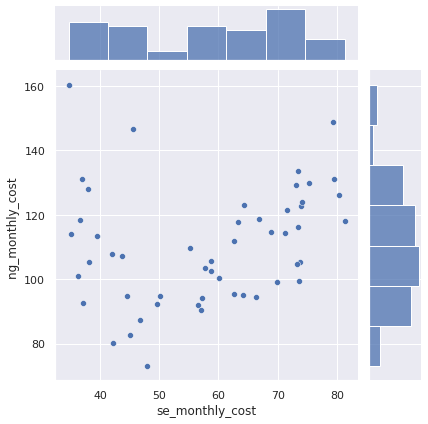

In [ ]:
sns.jointplot(y = energy_cost['ng_monthly_cost '], x = energy_cost['se_monthly_cost'])

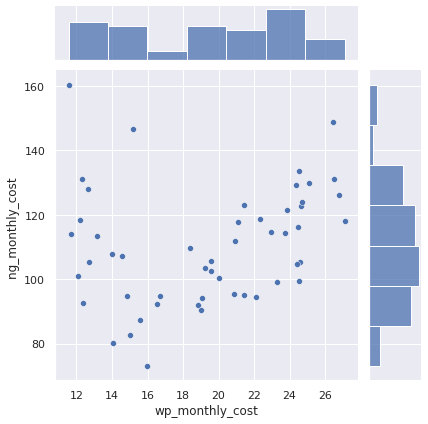

In [ ]:
sns.jointplot(y = energy_cost['ng_monthly_cost '], x = energy_cost['wp_monthly_cost'])

##Explore the Data (EDA)

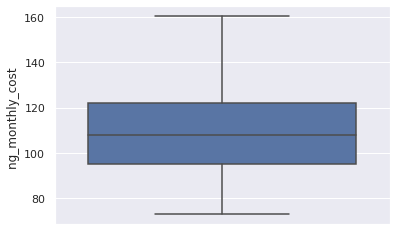

In [ ]:
sns.boxplot(y = energy_cost['ng_monthly_cost '])

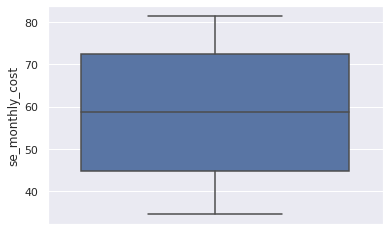

In [ ]:
sns.boxplot(y = energy_cost['se_monthly_cost'])

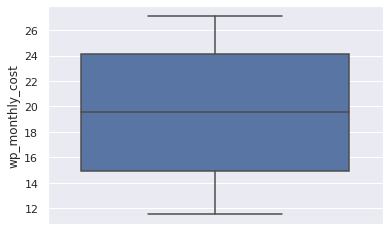

In [ ]:
sns.boxplot(y = energy_cost['wp_monthly_cost'])

##Explore a scatterplot on the monthly cost between Natural Gas and Solar Power.

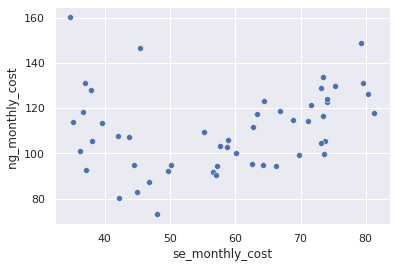

In [ ]:
sns.scatterplot(y='ng_monthly_cost ', x='se_monthly_cost', data=energy_cost)

##Explore a scatterplot on the monthly cost between Natural Gas and Wind Power.

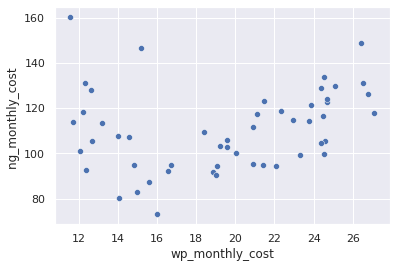

In [ ]:
sns.scatterplot(y='ng_monthly_cost ', x='wp_monthly_cost', data=energy_cost)

##Analyze the Data


Running a Pearson R test on monthly cost between Natural Gas and Solar Power.

In [ ]:

stats.pearsonr(monthly_cost['ng_monthly_cost '], monthly_cost['se_monthly_cost'])

(0.22766003065356494, 0.10812259420962361)

Running a Pearson R test on monthly cost between Natural Gas and Wind Power.

In [ ]:
stats.pearsonr(monthly_cost['ng_monthly_cost '], monthly_cost['wp_monthly_cost'])

(0.2276766468237906, 0.10809616109006029)

##Analyze the histplot data.

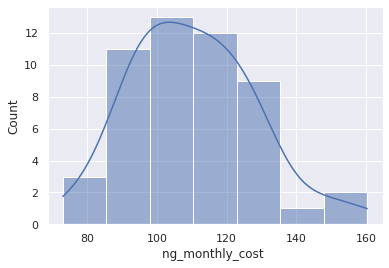

In [ ]:
sns.histplot(energy_cost['ng_monthly_cost '], kde=True)

Running a ttest on the monthly cost between Natural Gas and Solar Power.

In [ ]:
stats.ttest_ind(monthly_cost['ng_monthly_cost '], monthly_cost['se_monthly_cost'])

Ttest_indResult(statistic=16.072432880052858, pvalue=1.8052470248657215e-29)

Running a ttest on the monthly cost between Natural Gas and Wind Power.

In [ ]:
stats.ttest_ind(monthly_cost['ng_monthly_cost '], monthly_cost['wp_monthly_cost'])

Ttest_indResult(statistic=34.95137181574872, pvalue=7.288143766906994e-58)

##The data show that there is a significant difference between the cost of Natural Gas Energy and Solar Power Energy.

##The data show that there is a significant difference between the cost of Natural Gas Energy and Wind Power Energy.

#My recommendation is where possible, the switch to Solar Power or Wind Power is most beneficial to the average residential consumer.

